In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
golf = pd.read_csv('golf.csv', sep=",", index_col=None)
golf.head()

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [3]:
golf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Outlook    14 non-null     object
 1   Temp       14 non-null     object
 2   Humidity   14 non-null     object
 3   Windy      14 non-null     bool  
 4   Play Golf  14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [4]:
golf.shape

(14, 5)

In [5]:
golf.describe()

,Outlook,Temp,Humidity,Windy,Play Golf
count,14,14,14,14,14
unique,3,3,2,2,2
top,Rainy,Mild,High,False,Yes
freq,5,6,7,8,9


In [6]:
le = LabelEncoder()

In [7]:
golf['Outlook'] = le.fit_transform(golf['Outlook'])

In [8]:
golf['Temp'] = le.fit_transform(golf['Temp'])

In [9]:
golf['Humidity'] = le.fit_transform(golf['Humidity'])

In [10]:
golf['Windy'] = le.fit_transform(golf['Windy'])

In [11]:
golf['Play Golf'] = le.fit_transform(golf['Play Golf'])

In [12]:
golf

,Outlook,Temp,Humidity,Windy,Play Golf
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1
5,2,0,1,1,0
6,0,0,1,1,1
7,1,2,0,0,0
8,1,0,1,0,1
9,2,2,1,0,1


In [13]:
X = golf[['Outlook','Temp','Humidity','Windy']].values

In [14]:
y = golf['Play Golf'].values

In [15]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [16]:
X

array([[1, 1, 0, 0],
       [1, 1, 0, 1],
       [0, 1, 0, 0],
       [2, 2, 0, 0],
       [2, 0, 1, 0],
       [2, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 2, 0, 0],
       [1, 0, 1, 0],
       [2, 2, 1, 0],
       [1, 2, 1, 1],
       [0, 2, 0, 1],
       [0, 1, 1, 0],
       [2, 2, 0, 1]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [18]:
tree = DecisionTreeClassifier(random_state=42)

In [19]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
y_pred = tree.predict(X_test)

In [21]:
plt.figure(figsize = (10, 10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

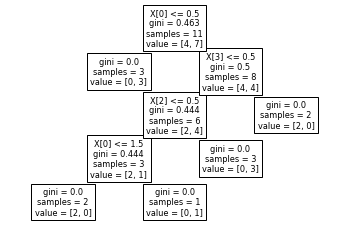

In [22]:
treeGolf = plot_tree(tree)
plt.show()

In [23]:
treeRules = export_text(tree)
treeRules

'|--- feature_0 <= 0.50\n|   |--- class: 1\n|--- feature_0 >  0.50\n|   |--- feature_3 <= 0.50\n|   |   |--- feature_2 <= 0.50\n|   |   |   |--- feature_0 <= 1.50\n|   |   |   |   |--- class: 0\n|   |   |   |--- feature_0 >  1.50\n|   |   |   |   |--- class: 1\n|   |   |--- feature_2 >  0.50\n|   |   |   |--- class: 1\n|   |--- feature_3 >  0.50\n|   |   |--- class: 0\n'

In [24]:
param = [{"max_depth" : list(range(2, 10))}]

In [25]:
tree =  GridSearchCV(DecisionTreeClassifier(), param, cv = 3, n_jobs = -1)

In [26]:
treeOpt = tree.fit(X_train, y_train)

In [27]:
print(f"Best score: {1. - treeOpt.best_score_}, Best paramater: {treeOpt.best_params_}")

Best score: 0.36111111111111116, Best paramater: {'max_depth': 2}


In [28]:
param = [{"max_depth" : list(range(2, 13))}]

In [29]:
tree =  GridSearchCV(DecisionTreeClassifier(), param, cv = 2, n_jobs = -1)

In [30]:
treeOpt = tree.fit(X_train, y_train)

In [31]:
print(f"Best score: {1. - treeOpt.best_score_}, , Best paramater: {treeOpt.best_params_}")

Best score: 0.3666666666666667, , Best paramater: {'max_depth': 2}


In [32]:
y_pred = treeOpt.predict(X_test)

In [33]:
confusion = confusion_matrix(y_pred, y_test)
confusion

array([[1, 1],
       [0, 1]])